# Exploratory Data Analysis

Notes à moi-même :
- Essayer de normaliser les données pour voir ce que ça donne
- Détecter les outliers et reprendre les études pour voir ce que ça donne (ex : "...more" pour les genres, les prix trop élevés, les livres avec très peu de notes, ...)
- Anova pour les prix
- Rating moyen des auteurs en fonction de leur nombre de livres parus (distributions)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc

## Preprocessing

In [3]:
df = pd.read_csv("./../../data/goodreads_data.csv", converters={"genres": lambda x: x[1:-1].split(",")})
df["publication_date"] = pd.to_datetime(df["published"].apply(lambda x: " ".join(str(x).split()[:3])), errors="coerce")
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,publication_info,literary_awards,original_title,series,characters,format,published,isbn,language,setting
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover","First published March 9, 2010",['Goodreads Choice Award Nominee for Mystery &...,The Weed That Strings the Hangman's Bag,['Flavia de Luce '],"['Flavia de Luce', 'Ophelia de Luce', 'Daphne ...","364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback","First published January 1, 1981","['Whitbread Award for First Novel (1981)', 'So...",A Good Man in Africa,NaN,['Morgan Leafy'],"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja']
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback","First published January 1, 2010",NaN,NaN,"['Weddings by Bella', 'Galveston Weddings']",NaN,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']"
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook","First published April 18, 2017",NaN,Reeve's End (working title only),NaN,"['Edie Greene', 'Winter Crane', 'Tanner Robson...","515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback","First published January 1, 2013",NaN,Dawn of Rebellion,['Dawn of Rebellion'],NaN,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN


In [4]:
print("Number of books (with duplicates) : ", len(df))
df.drop_duplicates(subset=["title", "author"], keep='first', inplace=True, ignore_index=True)
print("Number of books (without duplicates) : ", len(df))

Number of books (with duplicates) :  24630
Number of books (without duplicates) :  19666


## Ratings Analysis

In [5]:
dic_rating = {1: "one_star", 2: "two_stars", 3: "three_stars", 4: "four_stars", 5: "five_stars"}
for key, value in dic_rating.items():
    df[value] = df["ratings"].apply(lambda x: float(x[1:-1].split(",")[key-1])) / df["n_ratings"]
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,format,published,isbn,language,setting,one_star,two_stars,three_stars,four_stars,five_stars
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,"364 pages, Hardcover","March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN,0.007093,0.027652,0.219726,0.461718,0.283811
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,"352 pages, Paperback","January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja'],0.017935,0.051216,0.243523,0.435233,0.252092
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,"336 pages, Paperback","May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']",0.006506,0.039963,0.195632,0.341543,0.416357
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,"515 pages, ebook","April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN,0.015915,0.054524,0.235485,0.385500,0.308576
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,"321 pages, Paperback","October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN,0.007042,0.042254,0.161972,0.288732,0.500000


<Axes: >

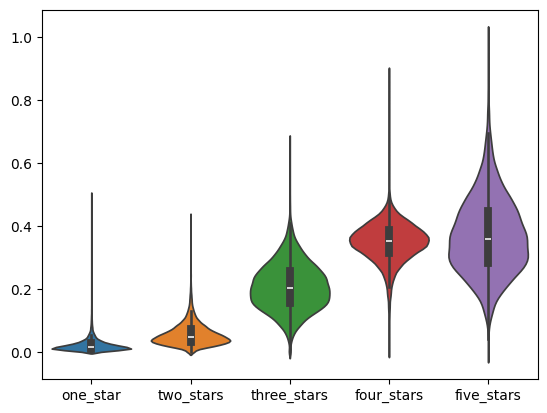

In [6]:
sns.violinplot(data=df[["one_star", "two_stars", "three_stars", "four_stars", "five_stars"]])

Le plus souvent, on décompte davantage de meilleures notes (supérieures à 3 étoiles) que de mauvaises notes.

In [7]:
df["average_rating"] = df["ratings"].apply(lambda x: sum([(i+1) * float(x[1:-1].split(",")[i]) for i in range(5)])) / df["n_ratings"]
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,published,isbn,language,setting,one_star,two_stars,three_stars,four_stars,five_stars,average_rating
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,"March 9, 2010 by Delacorte Press",9780385342315 (ISBN10: 0385342314),English,NaN,0.007093,0.027652,0.219726,0.461718,0.283811,3.987503
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,"January 14, 2003 by Vintage",9781400030026 (ISBN10: 1400030021),English,['Kinjanja'],0.017935,0.051216,0.243523,0.435233,0.252092,3.852332
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,"May 1, 2010 by Revell",9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']",0.006506,0.039963,0.195632,0.341543,0.416357,4.121283
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,"April 18, 2017 by Crown Books for Young Readers",9780399550348 (ISBN10: 0399550348),English,NaN,0.015915,0.054524,0.235485,0.385500,0.308576,3.916298
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,"October 17, 2013 by CreateSpace Independent Pu...",9781492942429 (ISBN10: 1492942421),English,NaN,0.007042,0.042254,0.161972,0.288732,0.500000,4.232394


<Axes: ylabel='average_rating'>

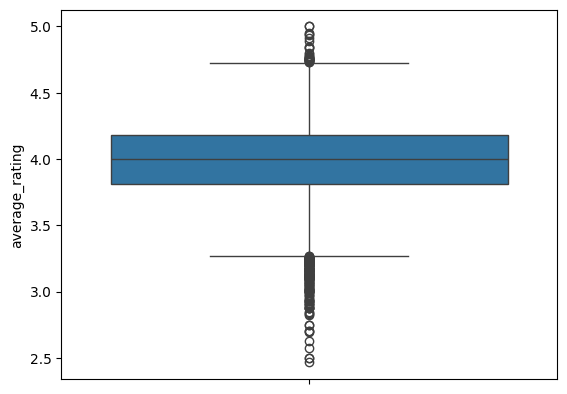

In [8]:
sns.boxplot(data=df["average_rating"])

De ce graphique, on peut déduire :
- Soit la distribution est biaisée, et les livres scrapés sont majoritairement des livres avec de très bonnes notes
- Soit les notes données par les utilisateurs sont généralement élevées
- Soit une majorité d'ouvrages sont bons

In [9]:
authors_average_rating = df[["author", "average_rating", "n_ratings"]].groupby("author").mean().sort_values(by="average_rating", ascending=False)
authors_average_rating.head(5)

,average_rating,n_ratings
author,,
Phillip B. Chute,5.000000,3.0
J. David Clarke,5.000000,2.0
Elias Zapple,4.946429,56.0
A. Razor,4.944444,18.0
Isabel Ibañez,4.909091,22.0


<Axes: xlabel='log_n_ratings', ylabel='average_rating'>

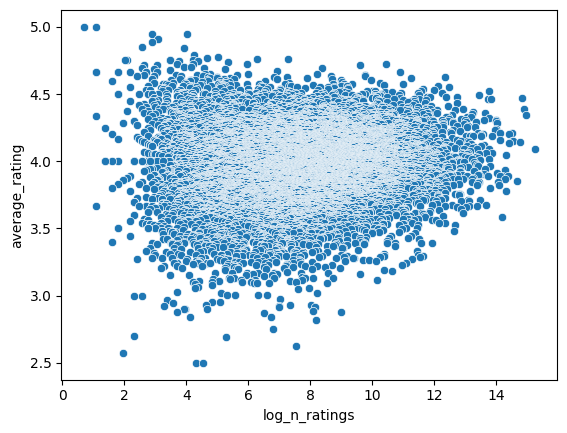

In [10]:
authors_average_rating["log_n_ratings"] = np.log(authors_average_rating["n_ratings"])
sns.scatterplot(authors_average_rating, x="log_n_ratings", y="average_rating")

Les avis paraissent plus extrêmes lorsqu'il y en a peu. En revanche, plus le nombre d'avis augmente, plus on semble converger sur une plage entre 3,5 et 4,5.

In [22]:
df.head(5)

,title,author,price,description,author_description,genres,n_ratings,n_reviews,ratings,pages_format,...,isbn,language,setting,one_star,two_stars,three_stars,four_stars,five_stars,average_rating,publication_date
0,The Weed That Strings the Hangman's Bag,Alan Bradley,4.99,From Dagger Award-winning and internationally ...,Librarian Note: There is more than one author ...,"['Mystery', 'Fiction', 'Historical Fiction',...",55692.0,5756.0,"[395.0, 1540.0, 12237.0, 25714.0, 15806.0]","364 pages, Hardcover",...,9780385342315 (ISBN10: 0385342314),English,NaN,0.007093,0.027652,0.219726,0.461718,0.283811,3.987503,2010-03-09
1,A Good Man in Africa,William Boyd,11.99,"In the small African republic of Kinjanja, Bri...","Note: William^^BoydOf Scottish descent, Boyd w...","['Fiction', 'Africa', 'Humor', 'Novels', '...",5018.0,298.0,"[90.0, 257.0, 1222.0, 2184.0, 1265.0]","352 pages, Paperback",...,9781400030026 (ISBN10: 1400030021),English,['Kinjanja'],0.017935,0.051216,0.243523,0.435233,0.252092,3.852332,2003-01-14
2,It Had to Be You,Janice Thompson,0.00,Bella couldn't be happier that her long-feudin...,"Welcome to the wacky, wonderful world of inspi...","['Christian Fiction', 'Romance', 'Christian'...",2152.0,132.0,"[14.0, 86.0, 421.0, 735.0, 896.0]","336 pages, Paperback",...,9780800733445 (ISBN10: 0800733444),English,"['Galveston, Texas']",0.006506,0.039963,0.195632,0.341543,0.416357,4.121283,2010-05-01
3,Missing,Kelley Armstrong,6.99,Everyone knows they left. No one knows they're...,Kelley Armstrong has been telling stories sinc...,"['Young Adult', 'Mystery', 'Thriller', 'Fic...",3393.0,491.0,"[54.0, 185.0, 799.0, 1308.0, 1047.0]","515 pages, ebook",...,9780399550348 (ISBN10: 0399550348),English,NaN,0.015915,0.054524,0.235485,0.385500,0.308576,3.916298,2017-04-18
4,Dawn of Rebellion,Michelle Lynn,0.00,"My name is Dawn Nolan, and I've grown up on th...",Michelle moved around the Midwest most of her ...,"['Young Adult', 'Dystopia', 'Romance', 'Sci...",142.0,76.0,"[1.0, 6.0, 23.0, 41.0, 71.0]","321 pages, Paperback",...,9781492942429 (ISBN10: 1492942421),English,NaN,0.007042,0.042254,0.161972,0.288732,0.500000,4.232394,2013-10-17


In [ ]:
# Nb ratings et moyenne selon l'année de publication